In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
(x_train,y_train),(x_test,y_test)=mnist.load_data()
X=x_test

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

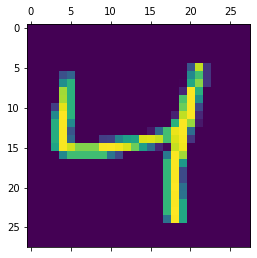

In [4]:
plt.matshow(x_train[2])

In [5]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# chuyển mảng 2 chiều thành 1 chiều
# làm phẳng hiển thi dạng mảng 28*28 pitxel
#x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
#x1_train=x_train.reshape(60000,28*28)
#x1_test=x_test.reshape(10000,28*28)

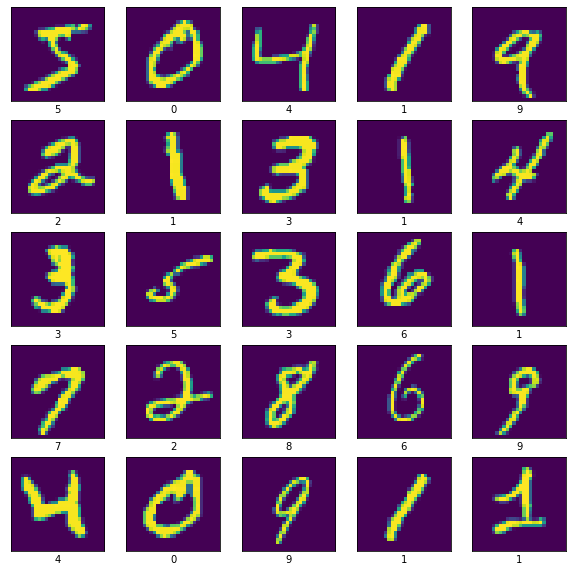

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])

  plt.xlabel(y_train[i])
plt.show()


In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [10]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_test/=255
x_train/=255

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train=to_categorical(y_train,10)    # 10 lớp
y_test=to_categorical(y_test,10)

In [14]:

from keras.models import  Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
#from tensorflow.keras import datasets, layers, models


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [16]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(28,28,1)))

model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [18]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [19]:
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01, momentum=0.9)   #Tỷ lệ học tập. Mặc định là 0,01, 
from tensorflow.keras.optimizers import RMSprop

import keras
#categorical_crossentropy: chéo phân loai
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=RMSprop(),metrics=['accuracy'])


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
#model.save('/content/drive/MyDrive/Colab Notebooks/model_CNN_mnist.h5')
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/model_CNN_weights_mnist.h5')

In [53]:
#model.save('model_CNNmnist.h5')
#model.save_weights('CNNmnist_weight.h5')

In [54]:
history=model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test),batch_size=128,verbose=1)


Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2248 - accuracy: 0.9299 - val_loss: 0.0433 - val_accuracy: 0.9854
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0692 - accuracy: 0.9789 - val_loss: 0.0387 - val_accuracy: 0.9875
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.0330 - val_accuracy: 0.9901
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0272 - val_accuracy: 0.9918
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0215 - val_accuracy: 0.9922
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0212 - val_accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0295 - accuracy: 0.9911 - val_loss: 0.0239 - val_accuracy: 0.9923
Epoch

In [55]:
model.save('/content/drive/MyDrive/Colab Notebooks/model_CNN_mnist.h5')
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/model_CNN_weights_mnist.h5')

In [21]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/model_CNN_mnist.h5')

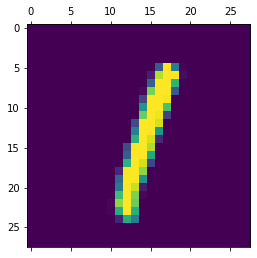

In [28]:
plt.matshow(X[5])

In [29]:
import numpy as np
y_predicted = model.predict(x_test)
np.argmax(y_predicted[5])

1

In [59]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f'test_acc: {test_acc*100}') 

test_acc: 99.34999942779541


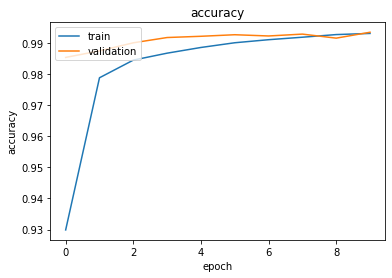

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [31]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1]

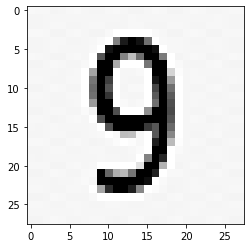

In [79]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('so9.png',target_size=(28,28,1))
plt.imshow(img)

In [86]:

img=img_to_array(img)  # tạo mảng
img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,28,28,1)

In [87]:
img=img.astype('float32')
img=img/255
import numpy as np
np.argmax(model.predict(img),axis=1)

array([8])